##  Spectral clustering of data sets
ist eine leistungsfähige Methode zur Gruppierung von Daten in großen Datensätzen, erfordert jedoch sorgfältige Planung, Berechnungsoptimierung und Parameterauswahl, um gute Ergebnisse zu erzielen.

Das spektrale Clustering ist eine Technik zur Gruppierung von Datenpunkten in einem Datensatz anhand ihrer Ähnlichkeiten, die im Spektrum einer Affinitätsmatrix erfasst werden. Es ist besonders nützlich, wenn traditionelle Clustering-Algorithmen aufgrund der hohen Dimensionalität oder der komplexen Struktur der Daten nicht effektiv sind. Hier ist eine Erklärung, wie das spektrale Clustering in Bezug auf große Datensätze funktioniert:

- Ähnlichkeitsmatrix erstellen
- Laplacian-Matrix berechnen
- Eigenvektoren und Eigenwerte berechnen
- K-Means-Clustering der Eigenvektoren
- Clusterzuweisung

<Axes: xlabel='x', ylabel='y'>

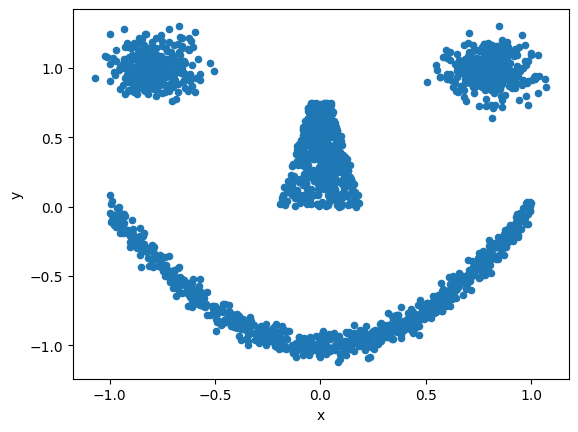

In [3]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
    "data.txt", 
    sep=" ",
    names=["x","y","series_number"]
)
data.plot.scatter(0,1)

## running k-means on data

<Axes: xlabel='x', ylabel='y'>

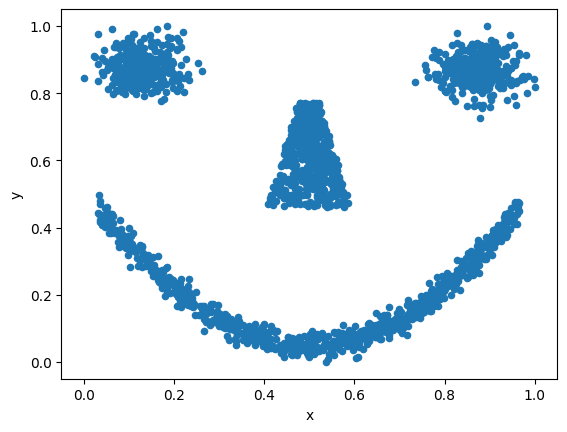

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Standardizing the data
#data = data.loc[:,'x':'y']
data.pop('series_number')
scaler = MinMaxScaler().fit(data)
transformed_data = scaler.fit_transform(data)
transformed_df = pd.DataFrame(transformed_data, columns=data.columns, index=data.index)

transformed_df.plot.scatter(0,1)


cenroids:
 [[0.88340958 0.81086123]
 [0.43101922 0.57291467]
 [0.55182141 0.14390036]
 [0.12737107 0.87153641]]


<Axes: xlabel='x', ylabel='y'>

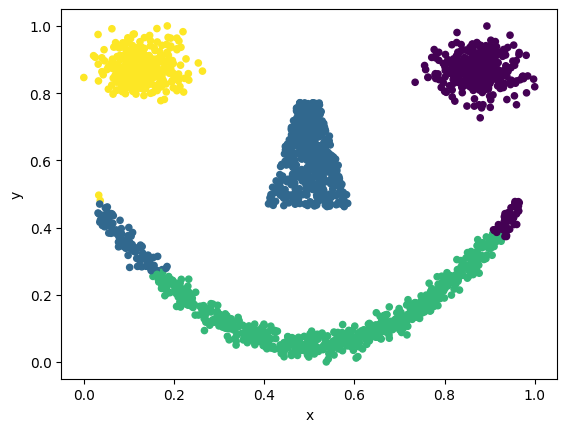

In [5]:
# Fitting k-means with 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 20).fit(transformed_data)
centroids = kmeans.cluster_centers_
print("cenroids:\n", centroids)

transformed_df.plot.scatter(0, 1, c=kmeans.labels_.astype(float))
#plt.scatter(transformed_df['x'], transformed_df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()


## running spectral clustering on data

<Axes: xlabel='x', ylabel='y'>

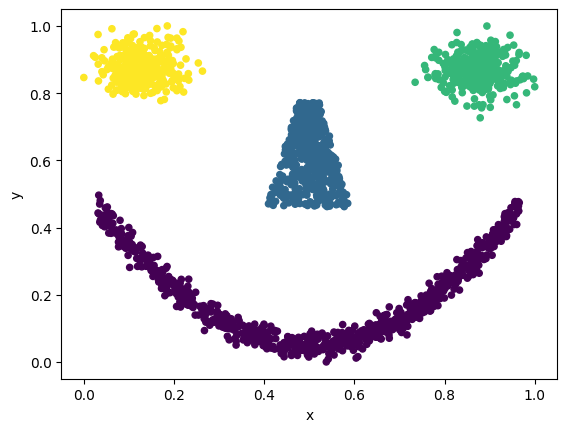

In [143]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(
    n_clusters = 4,
    affinity='rbf', # construct the affinity matrix using a radial basis function (RBF) kernel.
    #affinity="nearest_neighbors", # construct the affinity matrix by computing a graph of nearest neighbors.
    #n_neighbors = 20
    #assign_labels='kmeans', 
    #eigen_solver=None,
    #eigen_solver="arpack",
    gamma=15.0, # Kernel coefficient for rbf, poly, sigmoid, laplacian and chi2 kernels
).fit(transformed_data)

transformed_df.plot.scatter(0, 1, c=spectral_clustering.labels_.astype(float))

## Calculate the optimal number of clusters

In [6]:
import scipy.sparse as sc
import scipy
import numpy as np
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(transformed_data, metric='euclidean')

# OR Calculate pairwise Euclidean distances
# num_points = transformed_data.shape[0]
# indices_x, indices_y = np.meshgrid(np.arange(num_points), np.arange(num_points))
# distance_matrix = np.linalg.norm(transformed_data[indices_x] - transformed_data[indices_y], axis=2)

sigma = 1.0 # bandwidth parameter, finetuning ?!
affinity_matrix = np.exp(-distance_matrix ** 2 / (2 * sigma ** 2))


L = sc.csgraph.laplacian(affinity_matrix, normed=True)
n_components = affinity_matrix.shape[0]
print(n_components)
#eigenvalues, eigenvectors = sc.linalg.eigsh(L, k=n_components, which="SM", sigma=1.0, maxiter=10000)
eigenvalues, eigenvectors = np.linalg.eig(L)

2000


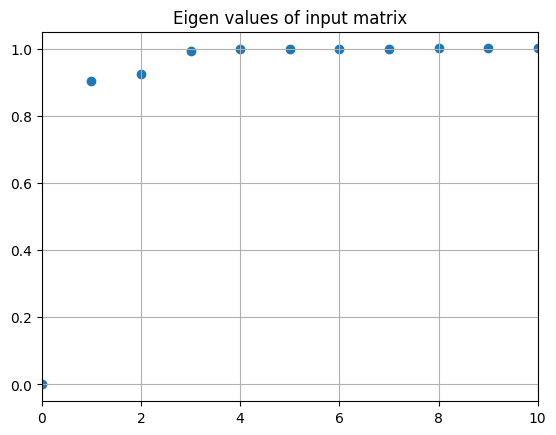

In [7]:
plt.title('Eigen values of input matrix')
plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
plt.xlim(0, 10)
plt.grid()

In [10]:
# w i p: yet not working ...

# https://github.com/ciortanmadalina/high_noise_clustering/blob/master/spectral_clustering.ipynb

index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:10]
test_diff = np.diff(eigenvalues)
print("test argmax:", np.argmax(test_diff))
print("indexes of largest gaps: ", index_largest_gap)
#print(eigenvalues[:10])
n_clusters = index_largest_gap + 1
print(f"optimal number of clusters (?) {n_clusters}:")

test argmax: 0
indexes of largest gaps:  [  0   2   1   3   5   4   7 408 523 413]
optimal number of clusters (?) [  1   3   2   4   6   5   8 409 524 414]:
